<a href="https://colab.research.google.com/github/cheeya-agwl/Stock-Market-Price-Movement-Prediction/blob/main/GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, Bidirectional,Activation

In [ ]:
from google.colab import drive
drive.mount('/content/driver')

KeyboardInterrupt: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
df=pd.read_csv('info1.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,11/27/2018,625.50,641.00,625.30,638.90,615.69,12285851
1,11/28/2018,640.95,668.70,640.00,666.40,642.19,17719890
2,11/29/2018,671.00,674.90,658.80,661.05,637.03,13399070
3,11/30/2018,661.00,672.00,660.95,667.45,643.20,10445773
4,12/3/2018,673.15,679.00,665.95,670.35,645.99,8260890
...,...,...,...,...,...,...,...
237,11/21/2019,715.50,721.45,710.50,713.25,713.25,9692973
238,11/22/2019,711.75,712.00,685.10,693.20,693.20,14415826
239,11/25/2019,693.35,705.15,693.20,698.10,698.10,7334511
240,11/26/2019,705.00,707.25,686.00,690.60,690.60,27252999


In [4]:
df.shape

(242, 7)

In [5]:
plt.style.use('fivethirtyeight')

<function matplotlib.pyplot.show(close=None, block=None)>

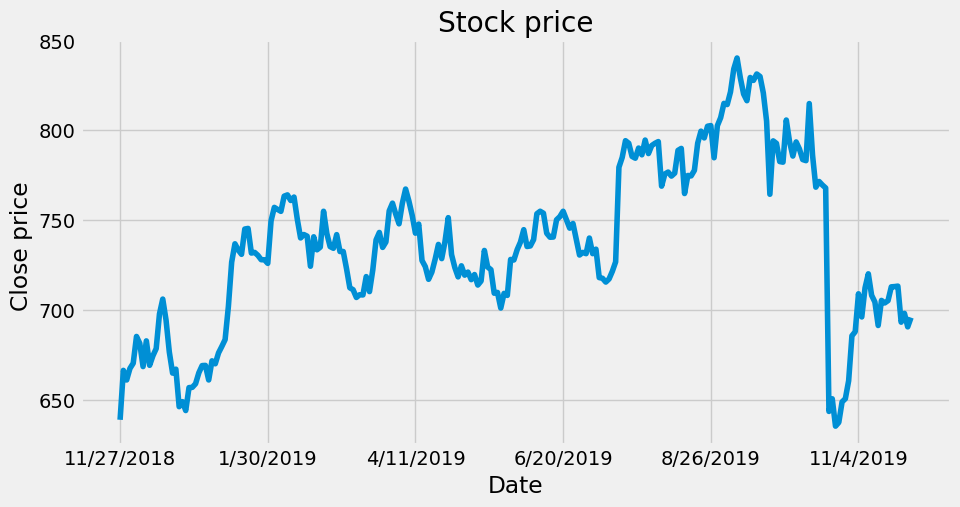

In [6]:
plt.figure(figsize=(10,5))
plt.title('Stock price')
plt.xlabel('Date')
plt.ylabel('Close price ')
plt.plot(df['Close'])
plt.xticks(np.arange(0,242,45),df['Date'][0:242:45])
plt.show

In [7]:
data=df.filter(['Close']) #used to take out df['Close'] column out of whole df
dataset=data.values  #used to arrange df['Close'] in array format i.e [[638.9],[666,4],[..]....[]]
training_data_length=int(len(dataset)*0.8)
training_data_length

193

In [8]:
scaler=MinMaxScaler(feature_range=(0,1)) #used to define scaler which will one hot encode data between value 0 to 1
scaled_data=scaler.fit_transform(dataset)  #will apply scaler to original dataset
scaled_data

array([[0.01733398],
       [0.15161133],
       [0.12548828],
       [0.15673828],
       [0.17089844],
       [0.24365234],
       [0.22485352],
       [0.16186523],
       [0.23168945],
       [0.1652832 ],
       [0.19116211],
       [0.21069336],
       [0.3046875 ],
       [0.34521484],
       [0.28833008],
       [0.20141602],
       [0.14404297],
       [0.15478516],
       [0.05297852],
       [0.06665039],
       [0.04248047],
       [0.10473633],
       [0.10546875],
       [0.11523438],
       [0.14501953],
       [0.16455078],
       [0.16503906],
       [0.12548828],
       [0.17749023],
       [0.16943359],
       [0.19897461],
       [0.21655273],
       [0.23510742],
       [0.32495117],
       [0.44555664],
       [0.49536133],
       [0.47851563],
       [0.46679688],
       [0.53540039],
       [0.53710938],
       [0.47021484],
       [0.47192383],
       [0.46386719],
       [0.45214844],
       [0.4519043 ],
       [0.44213867],
       [0.55761719],
       [0.594

In [9]:
train_data=scaled_data[0:training_data_length,:]
train_data.shape

(193, 1)

In [10]:
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])



x_train=np.array(x_train)
y_train=np.array(y_train)


x_train

array([[0.01733398, 0.15161133, 0.12548828, ..., 0.51611328, 0.43432617,
        0.5144043 ],
       [0.15161133, 0.12548828, 0.15673828, ..., 0.43432617, 0.5144043 ,
        0.47900391],
       [0.12548828, 0.15673828, 0.17089844, ..., 0.5144043 , 0.47900391,
        0.48632813],
       ...,
       [0.52392578, 0.51318359, 0.51367188, ..., 0.97021484, 1.        ,
        0.94604492],
       [0.51318359, 0.51367188, 0.56054688, ..., 1.        , 0.94604492,
        0.90209961],
       [0.51367188, 0.56054688, 0.5690918 , ..., 0.94604492, 0.90209961,
        0.8840332 ]])

In [11]:
x_train.shape

(133, 60)

In [12]:
y_train.shape

(133,)

In [13]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
#x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train

array([[[0.01733398],
        [0.15161133],
        [0.12548828],
        ...,
        [0.51611328],
        [0.43432617],
        [0.5144043 ]],

       [[0.15161133],
        [0.12548828],
        [0.15673828],
        ...,
        [0.43432617],
        [0.5144043 ],
        [0.47900391]],

       [[0.12548828],
        [0.15673828],
        [0.17089844],
        ...,
        [0.5144043 ],
        [0.47900391],
        [0.48632813]],

       ...,

       [[0.52392578],
        [0.51318359],
        [0.51367188],
        ...,
        [0.97021484],
        [1.        ],
        [0.94604492]],

       [[0.51318359],
        [0.51367188],
        [0.56054688],
        ...,
        [1.        ],
        [0.94604492],
        [0.90209961]],

       [[0.51367188],
        [0.56054688],
        [0.5690918 ],
        ...,
        [0.94604492],
        [0.90209961],
        [0.8840332 ]]])

In [14]:
model=Sequential()
model.add(Bidirectional(LSTM(50, return_sequences=True),input_shape=(60,1)))
model.add(Bidirectional(LSTM(50)))
model.add(Dense(25))
model.add(Dense(1))
#model.add(Activation('softmax'))

In [15]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 60, 100)          20800     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 100)              60400     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 83,751
Trainable params: 83,751
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(x_train,y_train,batch_size=1,epochs=100)

Epoch 1/100
133/133 [==============================] - 14s 47ms/step - loss: 0.0237 - accuracy: 0.0075
Epoch 2/100
133/133 [==============================] - 7s 55ms/step - loss: 0.0093 - accuracy: 0.0075
Epoch 3/100
133/133 [==============================] - 7s 55ms/step - loss: 0.0084 - accuracy: 0.0075
Epoch 4/100
133/133 [==============================] - 7s 49ms/step - loss: 0.0065 - accuracy: 0.0075
Epoch 5/100
133/133 [==============================] - 8s 56ms/step - loss: 0.0053 - accuracy: 0.0075
Epoch 6/100
133/133 [==============================] - 6s 45ms/step - loss: 0.0061 - accuracy: 0.0075
Epoch 7/100
133/133 [==============================] - 7s 56ms/step - loss: 0.0047 - accuracy: 0.0075
Epoch 8/100
133/133 [==============================] - 6s 46ms/step - loss: 0.0047 - accuracy: 0.0075
Epoch 9/100
133/133 [==============================] - 7s 56ms/step - loss: 0.0041 - accuracy: 0.0075
Epoch 10/100
133/133 [==============================] - 6s 46ms/step - loss: 0.00

In [18]:
#create test data
test_data=scaled_data[training_data_length-60:,:]
x_test=[]
y_test=dataset[training_data_length:,:]

for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

x_test=np.array(x_test)


In [19]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [20]:
x_test.shape

(49, 60, 1)

In [21]:
prediction=model.predict(x_test)
prediction=scaler.inverse_transform(prediction) #to convert data from one hot encoding to original format

2/2 [==============================] - 3s 27ms/step


In [22]:
prediction.shape

(49, 1)

In [23]:
from tensorflow.keras.layers import GRU

model2=Sequential()
model2.add(GRU(50,return_sequences=True,input_shape=(60,1)))
model2.add(GRU(50))
model2.add(Dense(25))
model2.add(Dense(1))
#model2.add(Activation('softmax'))

In [24]:
model2.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])

In [25]:
model2.fit(x_train,y_train,batch_size=1,epochs=100)

Epoch 1/100
133/133 [==============================] - 8s 28ms/step - loss: 0.0209 - accuracy: 0.0000e+00
Epoch 2/100
133/133 [==============================] - 4s 28ms/step - loss: 0.0060 - accuracy: 0.0075
Epoch 3/100
133/133 [==============================] - 5s 37ms/step - loss: 0.0051 - accuracy: 0.0075
Epoch 4/100
133/133 [==============================] - 4s 28ms/step - loss: 0.0043 - accuracy: 0.0075
Epoch 5/100
133/133 [==============================] - 4s 28ms/step - loss: 0.0044 - accuracy: 0.0075
Epoch 6/100
133/133 [==============================] - 5s 35ms/step - loss: 0.0044 - accuracy: 0.0075
Epoch 7/100
133/133 [==============================] - 4s 30ms/step - loss: 0.0038 - accuracy: 0.0075
Epoch 8/100
133/133 [==============================] - 4s 28ms/step - loss: 0.0033 - accuracy: 0.0075
Epoch 9/100
133/133 [==============================] - 4s 32ms/step - loss: 0.0033 - accuracy: 0.0075
Epoch 10/100
133/133 [==============================] - 4s 32ms/step - loss: 0

In [26]:
prediction2=model2.predict(x_test)
prediction2=scaler.inverse_transform(prediction2)

2/2 [==============================] - 1s 15ms/step


In [27]:
from sklearn.metrics import mean_squared_error
rm2=np.sqrt(mean_squared_error(prediction2,y_test))
print("Testing error is",rm2)
#by changing no of epochs from 50 to 100 our error decresed drom 30 to 27

Testing error is 26.542445748508595


<ipython-input-28-97044a2e61fd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction']=prediction2


ValueError: ignored

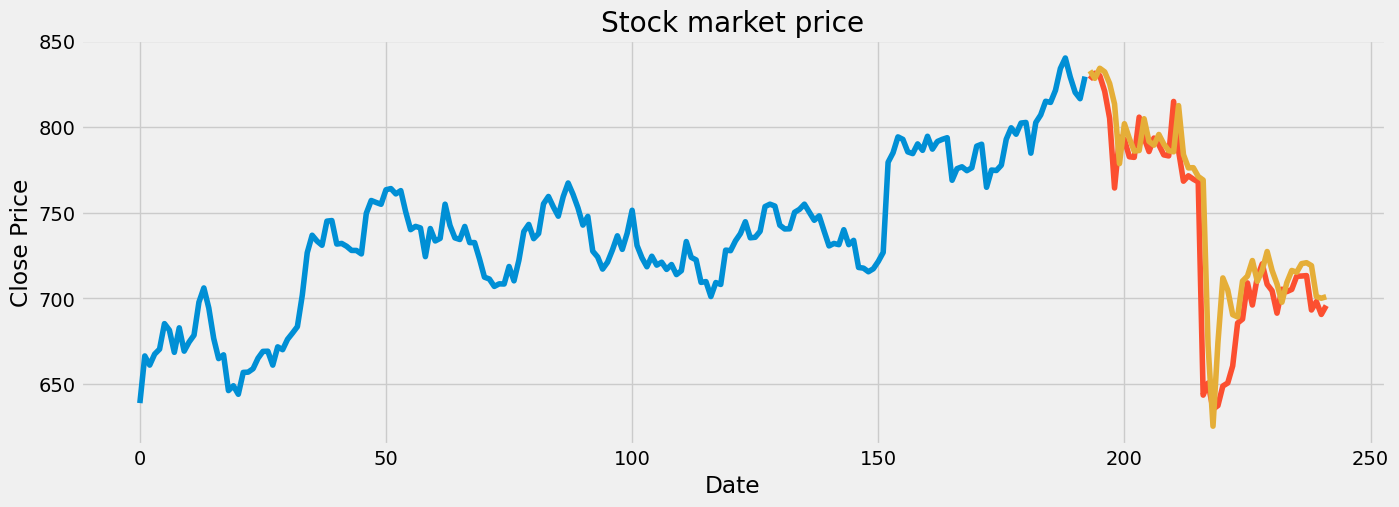

In [28]:
train=data[:training_data_length]
valid=data[training_data_length:]
valid['Prediction']=prediction2
plt.figure(figsize=(15,5))
plt.title('Stock market price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(train['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['train','valid','prediction'],loc='Lower right')
plt.xticks(np.arange(0,242,45),df['Date'][0:242:45])
plt.show()

In [29]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 60, 50)            7950      
                                                                 
 gru_1 (GRU)                 (None, 50)                15300     
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 24,551
Trainable params: 24,551
Non-trainable params: 0
_________________________________________________________________


In [30]:
valid['Date']=df['Date'][training_data_length:]
valid

<ipython-input-30-9d97c52a73bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Date']=df['Date'][training_data_length:]


,Close,Prediction,Date
193,827.70,832.696655,9/16/2019
194,831.25,828.281616,9/17/2019
195,829.85,834.159668,9/18/2019
196,820.70,832.058777,9/19/2019
197,805.00,825.281555,9/20/2019
198,764.35,813.297180,9/23/2019
199,794.05,778.548035,9/24/2019
200,792.65,801.815430,9/25/2019
201,782.55,793.273804,9/26/2019
202,782.20,785.891357,9/27/2019
